# Big Picture

The data that I am working with is housing sales data from King County, USA. I am looking to see if I can find a way to predict the pricing of houses in King County using data like the number of bathrooms, number of bedrooms, square footage, and other metrics similar to those. We could be able to pitch this model to a real estate company to help with pricing houses

data from: https://www.kaggle.com/harlfoxem/housesalesprediction

# Getting the Data

In [179]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

house = pd.read_csv('kc_house_data.csv')

In [180]:
import os
size = os.path.getsize('kc_house_data.csv')
size

2515206

The file that I am using is 2.5 MB

In [181]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The number of entries in my data set is 21613. The features that it has are: price, number of bedrooms, number of bathrooms, square footage of living space, square footage of lot, the number of floors, whether or not the property is on the water front, a rating of the view, a rating of the condtion of the house, a grade given by the King County grading system, square footage of the above floors, square footage of the basement, the year built, the year renovated, the zipcode, the longitute, the latitude, the square footage of the living space in 2015, the square footage of the lot in 2015. The last two categories are included to include any changes in square footage due to renovations.

Just looking through the data we learn a little about the statistics of the data. The mean of prices is 540,000. The max is 7.7 million and the min is 75,000. There are some houses with 0 bedrooms and 0 bathrooms which probably need to be removed. There is a house with 3.5 floors which is confusing. The waterfront category is binary. The view is rated on a scale of 0-4, condition is on a scale of 1-5, grade is a scale of 1-13. Year renovated only has values of 2015 so it is probably useless and the other features related to it should probably be removed.

# Discovery and Visualization

In [182]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [183]:
corr_matrix = house.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [184]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F649B41C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F658FB1A90>]], dtype=object)

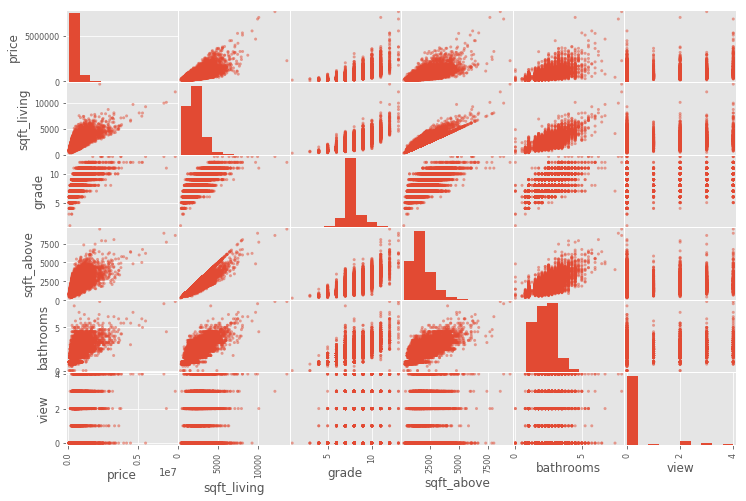

In [185]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade",
              "sqft_above", "bathrooms", "view"]
scatter_matrix(house[attributes], figsize=(12, 8))

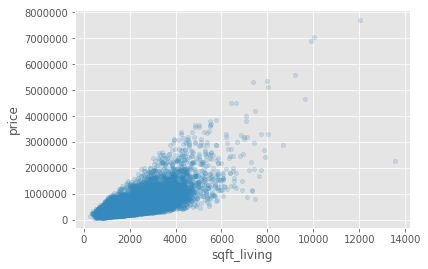

In [186]:
house.plot(kind="scatter", x="sqft_living", y="price",
             alpha=0.2)

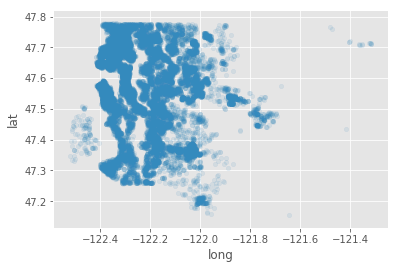

In [187]:
house.plot(kind="scatter", x="long", y="lat", alpha=0.1)

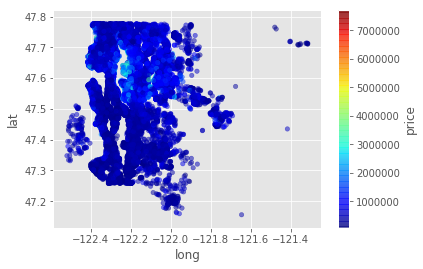

In [188]:
house.plot(kind="scatter", x="long", y="lat", alpha=0.5,
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

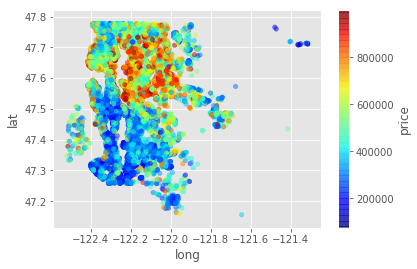

In [189]:
house_remove_outlier = house[house.price < 1000000]
house_remove_outlier.plot(kind="scatter", x="long", y="lat", alpha=0.5,
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Removing houses of really high values allows us to get a better view of the price ranges

# Preparing Data

In [190]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [191]:
sample_incomplete_rows = house[house.isnull().any(axis=1)].head()
sample_incomplete_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


The only data type that is not numerical is the date field. I do not plan on using this in my models so there is no need to convert the field. There are no null values so we do not need to handle any of those. Now we need to just go through and find anomolies and remove those

In [192]:
house = house[house.bedrooms > 0]
house = house[house.bathrooms > 0]
house = house.round({'floors': 0})
house = house[house.price < 1000000]
house = house[house.bedrooms < 10]
house.view = house.view + 1 
house.grade = house.grade / 13 * 5
house = house.drop(['date', 'yr_renovated', 'sqft_lot15', 'sqft_living15'], axis=1)
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
count,2.010300e+04,20103.000000,20103.000000,20103.000000,20103.000000,2.010300e+04,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000,20103.000000
mean,4.610138e+09,467094.219669,3.319206,2.038477,1954.195046,1.450594e+04,1.513008,0.002885,1.161369,3.404517,2.886002,1691.671094,262.523952,1970.763568,98078.591404,47.555803,-122.213241
std,2.878290e+09,195507.014908,0.878406,0.701974,754.751794,3.999089e+04,0.554302,0.053637,0.617480,0.645213,0.389024,710.937640,403.785554,29.097821,53.314757,0.141734,0.142484
min,1.000102e+06,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,1.153846,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.140950e+09,314000.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,1.000000,3.000000,2.692308,1170.000000,0.000000,1951.000000,98033.000000,47.457400,-122.330000
50%,3.905120e+09,433000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,1.000000,3.000000,2.692308,1509.000000,0.000000,1974.000000,98065.000000,47.565600,-122.233000
75%,7.340601e+09,592000.000000,4.000000,2.500000,2410.000000,1.025000e+04,2.000000,0.000000,1.000000,4.000000,3.076923,2080.000000,500.000000,1996.000000,98118.000000,47.680100,-122.122000
max,9.900000e+09,999999.000000,9.000000,7.500000,7480.000000,1.651359e+06,4.000000,1.000000,5.000000,5.000000,4.615385,5710.000000,2720.000000,2015.000000,98199.000000,47.777600,-121.315000


We have removed the rows that have 0 bedrooms or bathrooms as this is not normal in a typical residential home. We have also gone and rounded the floors field as half floors don't really make sense. The view, condition, and grade were all ratings on different scales so we transformed those columns to put them all on a 1-5 rating scale. Finally we dropped date which was a non-numerical columns, and yr_renovated, sqft_lot15, and sqft_living15 as there was not enought relevant data in these columns for these to be included in the model. We also got rid of houses with an insane number of rooms or super expensive ones like the 7.7 million dollar one

In [193]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house)

X_train = train_set.drop(['price'], axis=1)
Y_train = train_set['price']
X_test = test_set.drop(['price'], axis=1)
Y_test = test_set['price']


# Selecting Models

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
predicted = lin_reg.predict(X_test)
RMSE = math.sqrt(mean_squared_error(Y_test, predicted))
RMSE

110839.45273957102

In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [197]:
predicted = tree_reg.predict(X_test)
RMSE = math.sqrt(mean_squared_error(Y_test, predicted))
RMSE

102617.78732084436

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [199]:
predicted = rf_reg.predict(X_test)
RMSE = math.sqrt(mean_squared_error(Y_test, predicted))
RMSE

78357.8998418911

From the root mean square error of the three regressors that we have run we see that the one that preforms the best is the Random Forest Regressor. Going forward we will want to fine tune this model. The RMSE is 78000 which is pretty high and hopefully we can bring it down with fine tuning.

# Fine Tuning Model

In [200]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [201]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [202]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [203]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

101377.514034 {'max_features': 2, 'n_estimators': 3}
85907.2517591 {'max_features': 2, 'n_estimators': 10}
81777.9328055 {'max_features': 2, 'n_estimators': 30}
91634.2135361 {'max_features': 4, 'n_estimators': 3}
80824.0059867 {'max_features': 4, 'n_estimators': 10}
77796.8769219 {'max_features': 4, 'n_estimators': 30}
89892.2645589 {'max_features': 6, 'n_estimators': 3}
79697.9594342 {'max_features': 6, 'n_estimators': 10}
76028.6702968 {'max_features': 6, 'n_estimators': 30}
89897.1318408 {'max_features': 8, 'n_estimators': 3}
78783.2258647 {'max_features': 8, 'n_estimators': 10}
76108.3884928 {'max_features': 8, 'n_estimators': 30}
96805.6991288 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
85040.5431031 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
94474.8785441 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
81183.2403444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
89916.3314684 {'bootstrap': False, 'max_features': 4, 'n_estim

In [204]:
pd.DataFrame(grid_search.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.055363,0.003403,-1.027740e+10,-2.796934e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-1.031678e+10,...,-9.933297e+09,-2.824737e+09,-1.044453e+10,-2.749364e+09,-1.030779e+10,-2.769142e+09,0.001950,0.000482,1.790412e+08,3.395362e+07
1,0.165442,0.008221,-7.380056e+09,-1.427980e+09,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-7.679806e+09,...,-7.005987e+09,-1.395768e+09,-7.552401e+09,-1.452598e+09,-7.497276e+09,-1.476711e+09,0.003055,0.000750,2.528113e+08,3.435570e+07
2,0.506755,0.024872,-6.687630e+09,-1.090665e+09,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-6.688139e+09,...,-6.588090e+09,-1.121532e+09,-6.864018e+09,-1.078799e+09,-6.669055e+09,-1.082399e+09,0.019569,0.002317,9.467258e+07,2.098142e+07
3,0.080406,0.003015,-8.396829e+09,-2.317033e+09,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",15,-8.184268e+09,...,-8.800247e+09,-2.439933e+09,-8.553224e+09,-2.287166e+09,-8.290498e+09,-2.347026e+09,0.001942,0.000011,2.456247e+08,7.118597e+07
4,0.277729,0.009234,-6.532520e+09,-1.286486e+09,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",7,-6.757483e+09,...,-6.362389e+09,-1.288765e+09,-6.762074e+09,-1.285941e+09,-6.552207e+09,-1.263310e+09,0.010241,0.001456,2.121783e+08,2.425212e+07
5,0.812375,0.025664,-6.052354e+09,-9.698678e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-6.257494e+09,...,-5.936296e+09,-9.783805e+08,-6.354911e+09,-9.727366e+08,-5.873399e+09,-9.776268e+08,0.014362,0.003785,2.118257e+08,8.920152e+06
6,0.126333,0.003009,-8.080619e+09,-2.174590e+09,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",12,-8.541240e+09,...,-8.065597e+09,-2.162573e+09,-8.421495e+09,-2.199990e+09,-7.752318e+09,-2.138593e+09,0.018301,0.000001,3.595421e+08,2.357742e+07
7,0.388439,0.009022,-6.351765e+09,-1.210577e+09,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",6,-6.694816e+09,...,-6.319735e+09,-1.205102e+09,-6.494969e+09,-1.224171e+09,-6.173102e+09,-1.195149e+09,0.017141,0.000644,2.223136e+08,9.925496e+06
8,1.156876,0.025067,-5.780359e+09,-9.421643e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",1,-5.877056e+09,...,-5.756358e+09,-9.473397e+08,-6.023770e+09,-9.213055e+08,-5.623159e+09,-9.505723e+08,0.019989,0.002281,1.543556e+08,1.585269e+07
9,0.143581,0.003610,-8.081494e+09,-2.130292e+09,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-8.272628e+09,...,-7.635020e+09,-2.079333e+09,-8.480656e+09,-2.081264e+09,-7.817756e+09,-2.159355e+09,0.004546,0.000491,3.095380e+08,4.925412e+07


In [205]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [206]:
predicted = final_model.predict(X_test)
final_RMSE = math.sqrt(mean_squared_error(Y_test, predicted))
final_RMSE

75298.59700227907

Using a grid search on our hyperparameter foud that the best estimator was with 8 max features and 30 n_estimators. Unfortunately this estimator is not much better than the original random forest regressor that we created. It only brought our RMSE down by 3000. However a better model is still a better model no matter how marginally better it is.

# Solution Presentation

Pitch: Setting the price of a house that it going to market is normally left up to guess work. While experts in the field of real estate may be able to normally set houses at their optimum price, there will always be times that they mess up and misprice a house. In these cases, the real estate agent would be losing money due to the house not being sold as fast as it couldve been sold. The family selling it and the agent would endure hardships that they probably could have avoided. My regression model seeks to more accurately price houses with cold hard data rather than guess work and that is why real estate companies should want my product.

What I've learned: There is more to creating a model than just manipulating data. You need to actually delve into your data and try to understand it if you want to create the best model that you could possibly create. 

# Planning for the Future

More Data?

I think it would always be good to get more data. I think that it would definitely improve my model and I would definitely be able to use more data to fine tune my model.

Future of the Model?

I do not think that this model could be left statically and still perform well in the future. The housing market is constantly changing from year to year and even month to month. If this model were to be implemented by a real estate company it would require upkeep. The model would constantly need new data and fine tuning if it were to continue to be as accurate as it could be.

Satisfied? 

I think that I am satisfied with how the first attempt at creating a model has gone for me. Houses can be negotiated up to 50,000 dollars in the King County area so having a RMSE that is pretty close to that number is good, especially considering my first couple models had RMSE values of 200,000 dollars which was nearly 50% of the mean house price. I think that going forward I could get better at selecting parameters and models in order to get that RMSE down even further.